In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV


In [2]:
data = pd.read_csv(os.path.join("pulsar_stars.csv"))
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,80.078125,38.439809,0.768375,2.152728,1.361204,10.806986,14.229757,276.425965,0
1,123.851562,52.519058,-0.091173,-0.248607,1.709866,16.418602,10.385942,115.405463,0
2,125.359375,47.108209,-0.049079,-0.138952,6.644649,33.302982,5.218990,26.923204,0
3,103.421875,50.946143,0.254738,0.018195,0.756689,11.656389,17.382170,324.065908,0
4,103.328125,55.639480,0.568718,0.138218,1.942308,15.704179,9.808039,110.090440,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                8028 non-null   float64
 1    Standard deviation of the integrated profile  8028 non-null   float64
 2    Excess kurtosis of the integrated profile     8028 non-null   float64
 3    Skewness of the integrated profile            8028 non-null   float64
 4    Mean of the DM-SNR curve                      8028 non-null   float64
 5    Standard deviation of the DM-SNR curve        8028 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           8028 non-null   float64
 7    Skewness of the DM-SNR curve                  8028 non-null   float64
 8   target_class                                   8028 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 564.6 KB


# Question 1

In [4]:
X = data.drop("target_class", axis=1)
y = data.target_class
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

# Question 2

In [5]:
def plot2D(X, y, col=None):
    if col == None:
        sns.pairplot(X.join(y), hue="target_class")
    else:
        sns.pairplot(X[col].join(y), hue="target_class")

In [6]:
X_train.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')

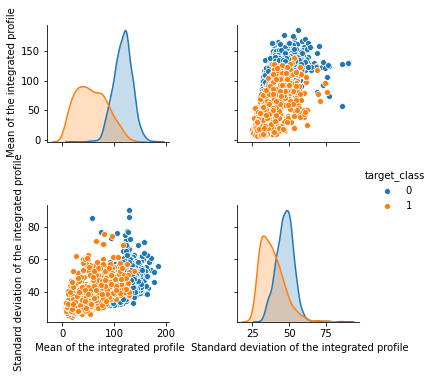

In [7]:
col = [' Mean of the integrated profile', ' Standard deviation of the integrated profile']
plot2D(X_train, y_train, col)

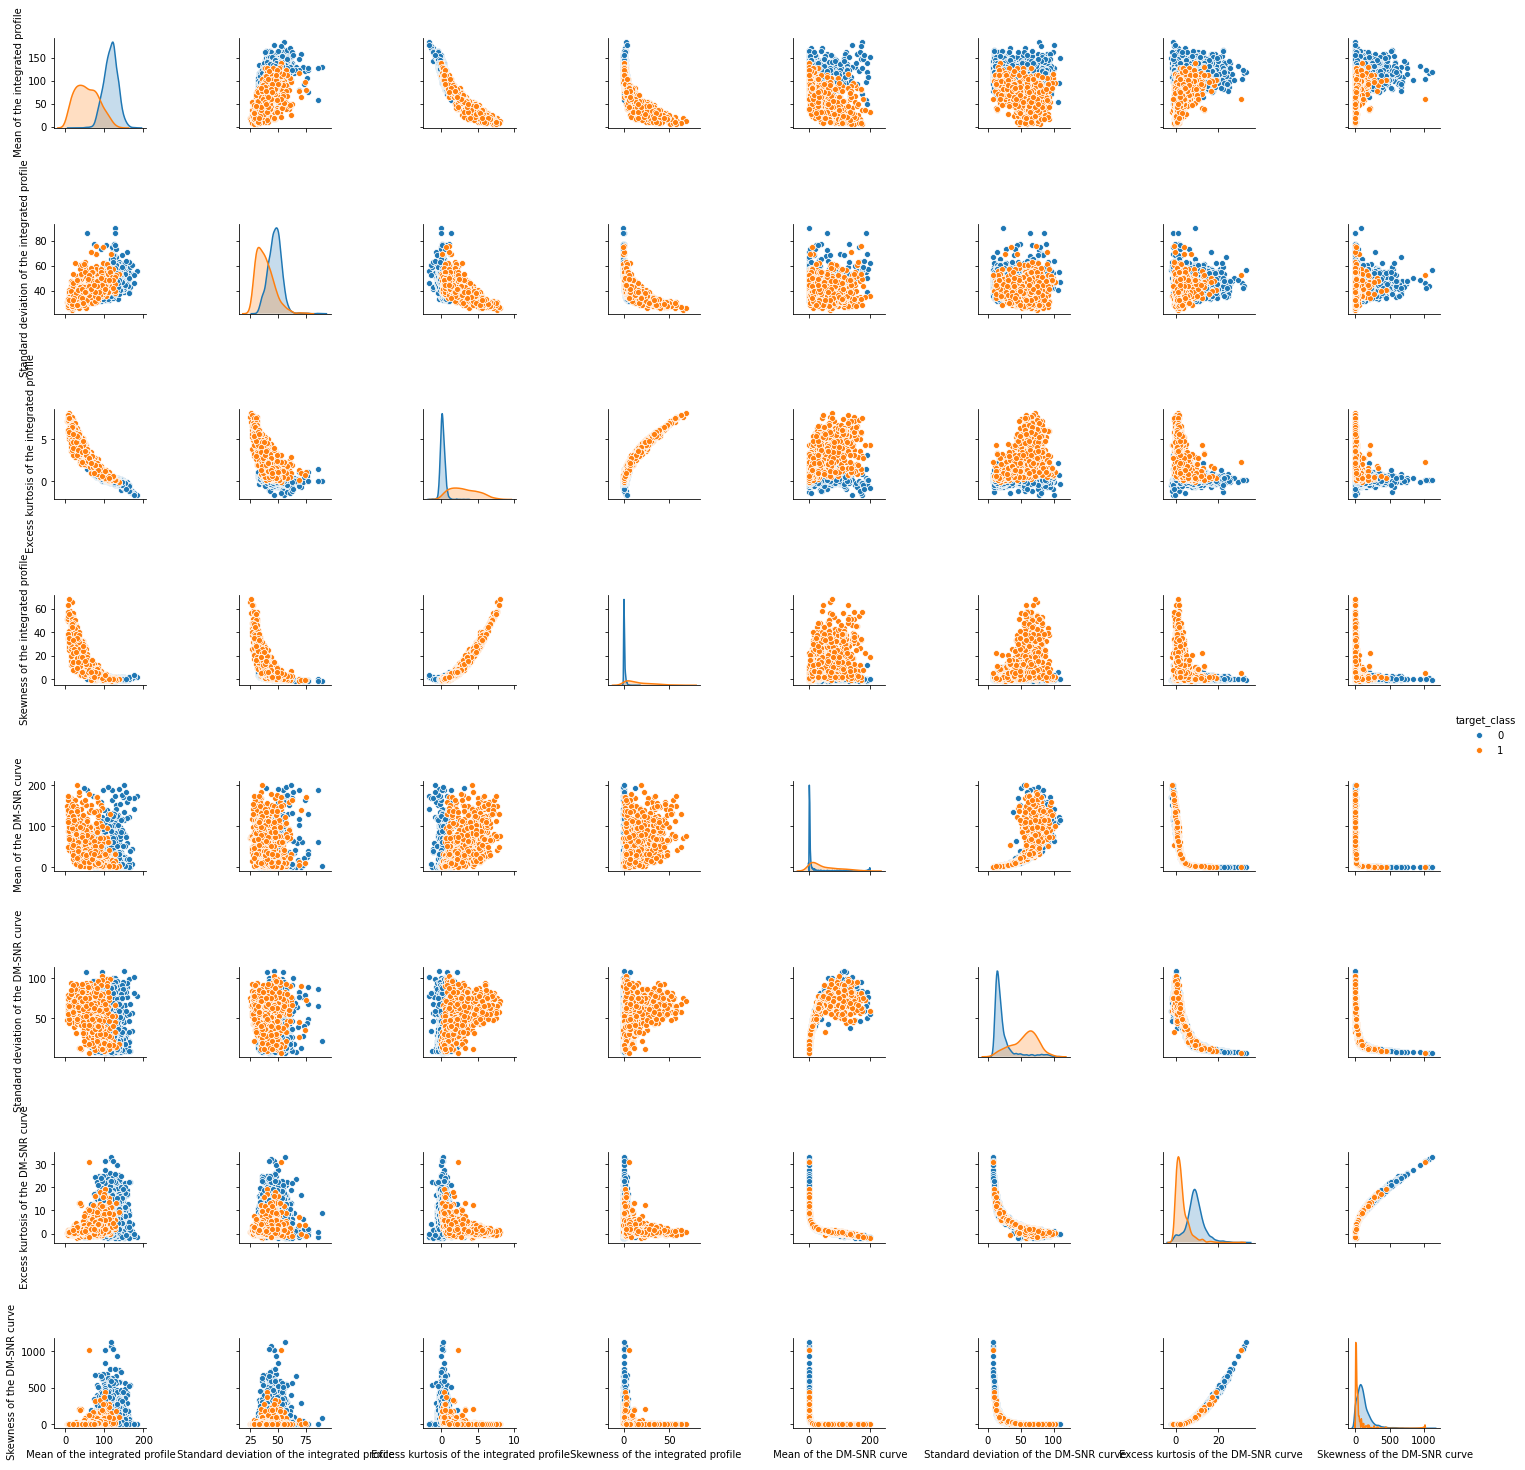

In [8]:
plot2D(X_train, y_train)

# Question 3 et 4

In [11]:
# CV
parameters = {'n_neighbors':range(1, 25)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring=["accuracy", "f1"], refit="f1")
clf.fit(X_train, y_train)

# Best estimator with accuracy score
best_accuracy_index = np.nonzero(clf.cv_results_['rank_test_accuracy'] == 1)[0][0]
best_accuracy_score = clf.cv_results_['mean_test_accuracy'][best_accuracy_index]
print(f"Best estimator: {clf.best_estimator_} with accuracy mean score of {round(best_accuracy_score,3)}.")

# Best estimator with f1 score
best_f1_index = np.nonzero(clf.cv_results_['rank_test_f1'] == 1)[0][0]
best_f1_score = clf.cv_results_['mean_test_f1'][best_f1_index]
print(f"Best estimator: {clf.best_estimator_} with f1 mean score of {round(best_f1_score,3)}.")

Best estimator: KNeighborsClassifier(n_neighbors=24) with accuracy mean score of 0.953.
Best estimator: KNeighborsClassifier(n_neighbors=24) with f1 mean score of 0.877.


# Question 5

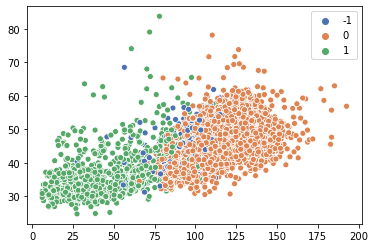

In [12]:
# Fit / predict
knn3 = KNeighborsClassifier(3)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)

# Plot y_test vs y_pred
error = y_test != y_pred
y_pred[error] = -1
# Select cols to plot
col1, col2 = X_test.columns[:2]
sns.scatterplot(x=X_test[col1].values, y=X_test[col2].values, hue=y_pred, palette='deep');
## Remarque : ce scatterplot est sur les deux premières coordonnées seulement. On pourrait aussi faire une ACP
## pour recueillir un peu plus d'informations

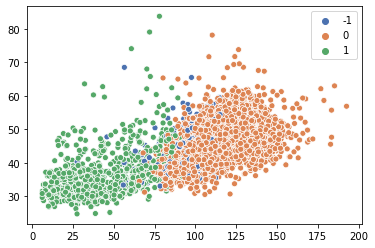

In [13]:
# Fit / predict
knn3 = KNeighborsClassifier(30)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)

# Plot y_test vs y_pred
error = y_test != y_pred
y_pred[error] = -1
# Select cols to plot 
col1, col2 = X_test.columns[:2]
sns.scatterplot(x=X_test[col1].values, y=X_test[col2].values, hue=y_pred, palette='deep');

# Question 6

In [14]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.

    Arguments:
            X: Feature data as a NumPy-type array en dimension 2
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            **model_params: Model parameters to be passed on to the ML estimator
    
    """
    X = np.array(X)
    y = np.array(y).flatten()
    
    
    ## Ici
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(X, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .5     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # return plt

## Pour k=5

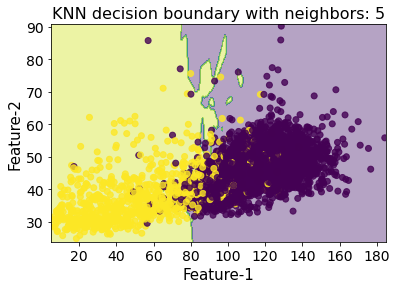

In [67]:
plt.figure()
# Reduces to the first two columns of data
reduced_data = np.array(X_train)[:, :2]
plt.title("KNN decision boundary with neighbors: 5",fontsize=16)
plot_decision_boundaries(reduced_data,y_train,KNeighborsClassifier,n_neighbors=5)
plt.show()

## Pour k=15

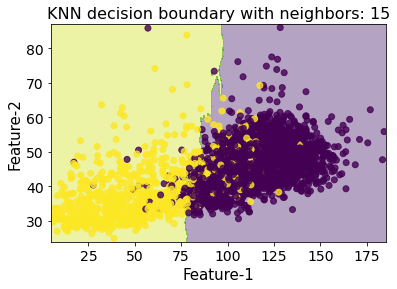

In [14]:
plt.figure()
plt.title("KNN decision boundary with neighbors: 15",fontsize=16)
plot_decision_boundaries(reduced_data,y_train,KNeighborsClassifier,n_neighbors=15)
plt.show()

## Pour k=30

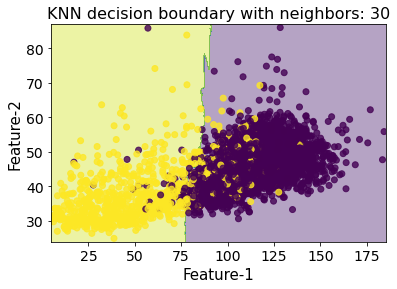

In [15]:
plt.figure()
plt.title("KNN decision boundary with neighbors: 30",fontsize=16)
plot_decision_boundaries(reduced_data,y_train,KNeighborsClassifier,n_neighbors=30)
plt.show()

In [79]:
## With PCA : pour avoir un aperçu potentiellement plus représentatif de la frontière de décision
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
reduced_data=np.array(pca.transform(X_train))

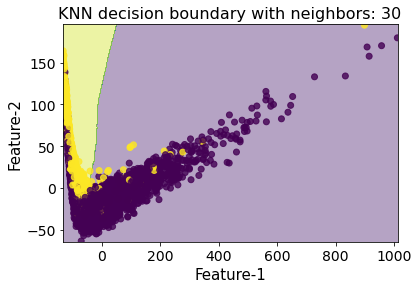

In [80]:
plt.figure()
plt.title("KNN decision boundary with neighbors: 30",fontsize=16)
plot_decision_boundaries(np.array(reduced_data),y_train,KNeighborsClassifier,n_neighbors=30)
plt.show()